# Task 2 - Data Cleaning of Airbnb NYC

Name:-Yashita Aggarwal

Domain:-Data Analytics

Oasis Infobyte Virtual Internship program

# Airbnb stands for AirBedandBreakfast

Airbnb is an online marketplace that allows people to rent out their properties or rooms to travellers.
Airbnb is an American company operating an online marketplace for short- and long-term homestays and experiences. The company acts as a broker and charges a commission from each booking.

# Importing important Libraries

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [6]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data Description

1.id ::  Unique for each Propety Listing.                                                                                       
2.name ::  Name of the each Propety Listing.                                                                                   
3.host_id :: Unique ID for host who have listed the property on Airbnb.                                                         
4.host_name :: Name of host                                                                                                     
5.neighbourhood_group :: Name of Each boroughs of NYC, Manhattan, Brooklyn,Queens,Bronx, State Island                           
6.neighbourhood :: Area in each borough of NYC                                                                                 
7.latitude, longitude :: Co-ordinates of each listed property                                                                   
8.room_type :: Differnt types of room available for listing , Private room,Entire home/apt,Shared room.                         
9.price :: Price of listing.                                                                                                   
10.minimum_nigths :: Mandatory number of nights to be booked for available for each type of property.                           
11.number_of_review :: Number of reviews for each Listed property                                                               
12.last_review :: Date on whcih last time the listing was reviewed  
13.review_per_month :: Number of reviews per month                                                                             
14.calculated_host_listings_count :: Number of listing each host owns                                                           
15.availablity 365 :: Number of days the given listing is available for booking

In [11]:
df.shape

(48895, 16)

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
df.duplicated().sum()

0

There are no duplicated values

In [22]:
df.isnull().sum()  #Checked the NULL Values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Replacing the NULL Values with appropriate values

In [25]:
df['name'].fillna('other hotel',inplace=True)
df['host_name'].fillna('other',inplace=True)
df['last_review'].fillna('Not Reviewed',inplace=True)
df['reviews_per_month'].fillna('0',inplace=True)

C:\Users\yashi\AppData\Local\Temp\ipykernel_1928\2190874722.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['reviews_per_month'].fillna('0',inplace=True)


In [27]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Dropping the unnecessary columns

In [30]:
df.drop(['id','last_review','name','latitude','longitude',],axis=1,inplace=True)

In [32]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


In [34]:
df.shape

(48895, 11)

# Hence the data is free from duplicates and NULL values and is ready for visualization

# Data Visualization

# 1.Top 10 Host Name

In [39]:
#Getting the value counts
x=df['host_name'].value_counts().iloc[:10]
x

host_name
Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Host name performer')

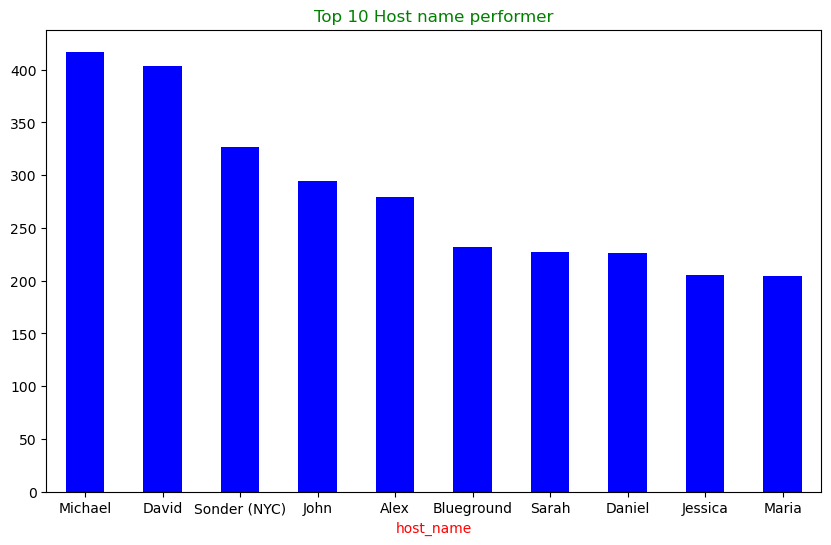

In [41]:
# Visualizing using bar plot
x.plot(kind='bar',figsize=(10,6),color='b')
plt.xlabel('host_name',size=10,color='r')
plt.xticks(rotation =0)
plt.title('Top 10 Host name performer',size=12,color='g')

# Observation                                                     

1.Host name is the name of the host who listed the hotel in the airbnb                                                         
2.It looks like the person Michael has the largest booking under his name with 417 bookings                                     
3.David is the host name with 403 bookings

# 2.Neighbourhood_group

 Neighbourhood group means the name of each boroughs(a small town inside a large town) of NYC like Manhattan,Brooklyn,Queens,
Bronx,State Island

In [47]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


In [49]:
# Getting the vlaue count
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [51]:
slices=df['neighbourhood_group'].value_counts()
names=['Manhattan','Brooklyn','Queens','Bronx','Staten Island']

Text(0.5, 1.0, 'Neighbourhood group')

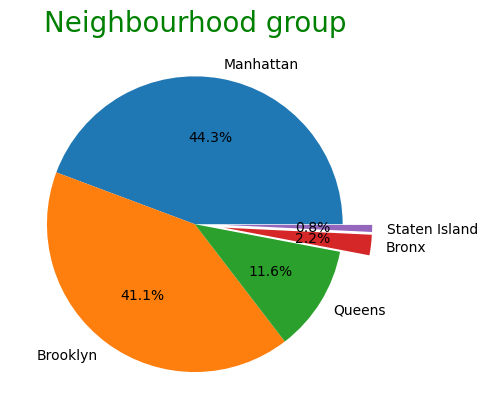

In [53]:
# Visualizing using pie chart
plt.pie(slices,labels=names,autopct='%1.1f%%',explode=(0,0,0,0.2,0.2))
plt.title('Neighbourhood group',size=20,color='g')

# Observations

1.It looks like Manhattan group has the largest bookings with 44.3%                                                             
2.Followed by Brooklyn with 41.1% share

# 3. Finding the top 10 host_id

In [58]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


In [60]:
h=df['host_id'].value_counts().iloc[:10]
h

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '219517861'),
  Text(1, 0, '107434423'),
  Text(2, 0, '30283594'),
  Text(3, 0, '137358866'),
  Text(4, 0, '16098958'),
  Text(5, 0, '12243051'),
  Text(6, 0, '61391963'),
  Text(7, 0, '22541573'),
  Text(8, 0, '200380610'),
  Text(9, 0, '7503643')])

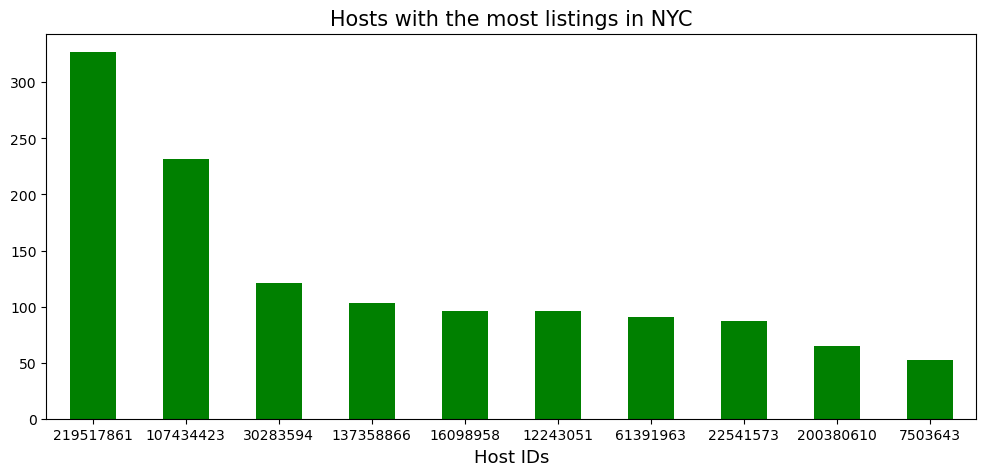

In [62]:
h.plot(kind='bar',figsize=(12,5),color='g')
plt.title('Hosts with the most listings in NYC',size=15)
plt.xlabel('Host IDs',size=13)
plt.xticks(rotation =0)

# Observation

1. First host has more than 300+ listings

# 4. Analysis of "Neighbourhood_group"  column with respect to "price" column

In [67]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


In [69]:
df.shape

(48895, 11)

# Checking for outliers in the "price" column

In [72]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

C:\Users\yashi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram')

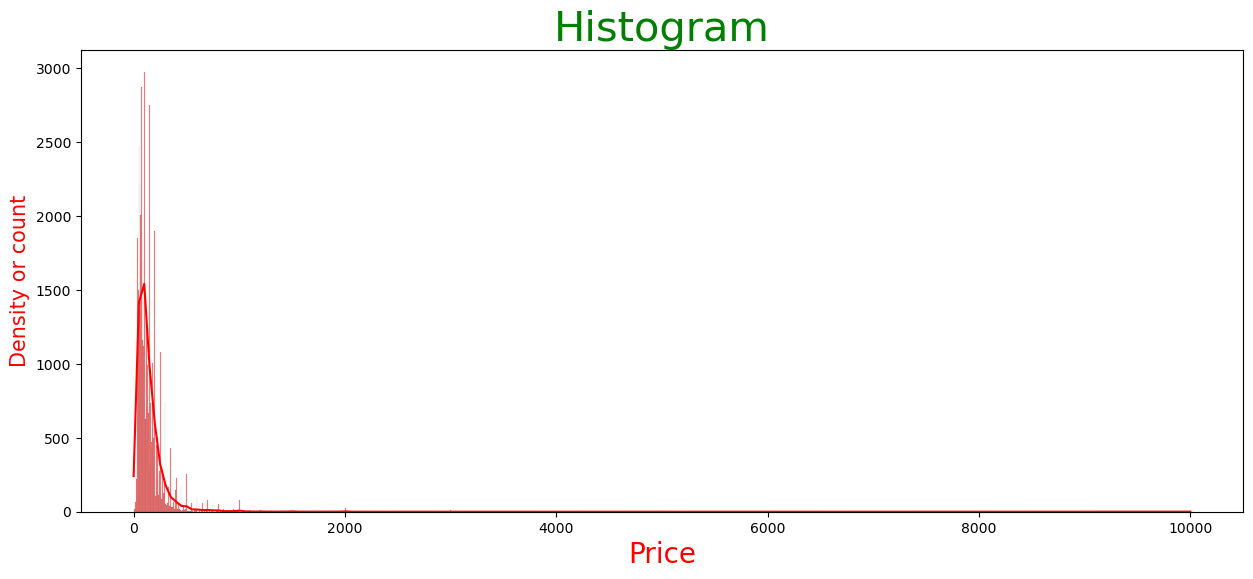

In [74]:
plt.figure(figsize=(15,6))
sns.histplot(x='price',data=df,color='r',kde=True)
plt.xlabel('Price',size=20,color='r')
plt.ylabel('Density or count', fontsize = 15,color='r')
plt.title('Histogram',size=30,color='g')

# Box Plot

Text(0.5, 1.0, 'Box Plot')

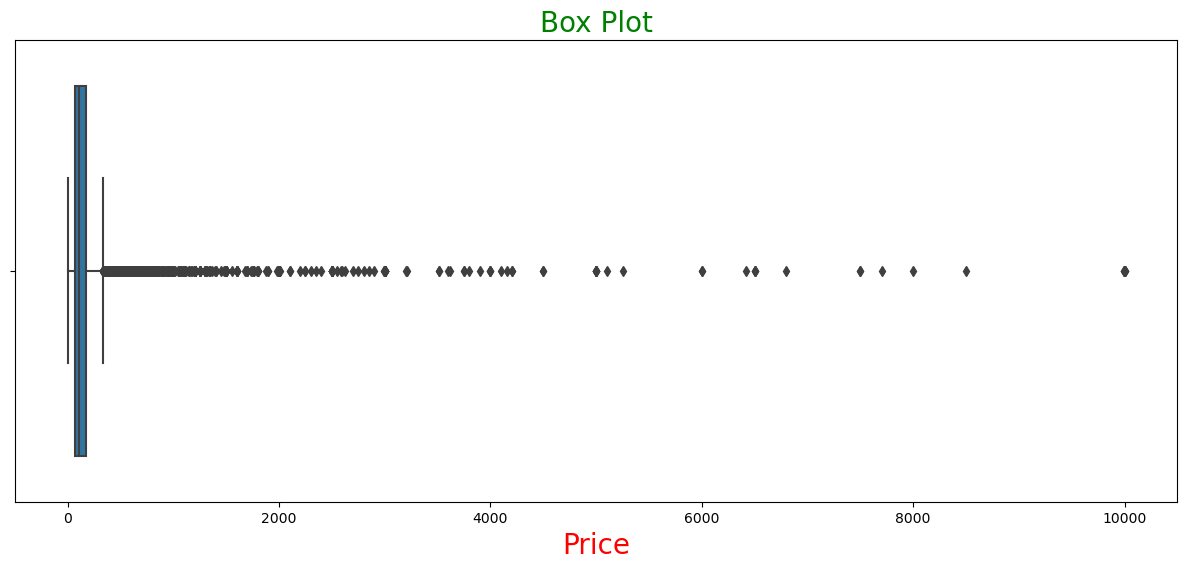

In [76]:
plt.figure(figsize = (15,6))
sns.boxplot(x ='price',data=df)
plt.xlabel('Price',size=20,color='r')
plt.title('Box Plot',size=20,color='g')

From the above Histogram and Box Plot we conclude that Price column contains Outlier data

# Outlier removal Using IQR

In [79]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)

In [80]:
# Finding the Inter Quartile range
IQR=Q3-Q1

In [81]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print('The lower limit is:',lower_limit)
print('The upper limit is:',upper_limit)

The lower limit is: -90.0
The upper limit is: 334.0


Any value beyond the range of Lower limit and upper limit will be the outliers

Printing the outliers

In [89]:
df[(df['price']<lower_limit) | (df['price']>upper_limit)]

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,60278,Petra,Manhattan,Chelsea,Entire home/apt,375,180,5,0.12,1,180
85,74303,Maggie,Brooklyn,Brooklyn Heights,Entire home/apt,800,1,25,0.24,1,7
103,93790,Ann,Manhattan,West Village,Entire home/apt,500,4,46,0.55,2,243
114,72062,Bruce,Manhattan,East Village,Entire home/apt,350,2,7,0.06,4,298
121,119588,Vero,Brooklyn,South Slope,Entire home/apt,400,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...
48758,73211393,LaGabrell,Queens,Long Island City,Entire home/apt,350,2,0,0,1,364
48833,29741813,Yue,Manhattan,Financial District,Entire home/apt,475,2,0,0,1,64
48839,274079964,Richard,Brooklyn,Sheepshead Bay,Private room,800,1,0,0,1,23
48842,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,Entire home/apt,350,1,0,0,1,9


Removing the outliers

In [92]:
df_new=df[(df['price']>lower_limit) & (df['price']<upper_limit)]
df_new.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


# Hence there is no outliers in the price column

In [95]:
df.groupby(['neighbourhood_group'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [97]:
df_new.groupby(['neighbourhood_group'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1070.0,77.365421,47.110940,0.0,45.0,65.0,95.0,325.0
Brooklyn,19415.0,105.699614,60.937808,0.0,60.0,90.0,140.0,333.0
Manhattan,19501.0,145.904620,70.417743,0.0,90.0,135.0,199.0,333.0
Queens,5567.0,88.904437,53.536041,10.0,50.0,74.0,108.0,325.0
Staten Island,365.0,89.235616,57.700147,13.0,50.0,75.0,105.0,300.0


# Violin plot

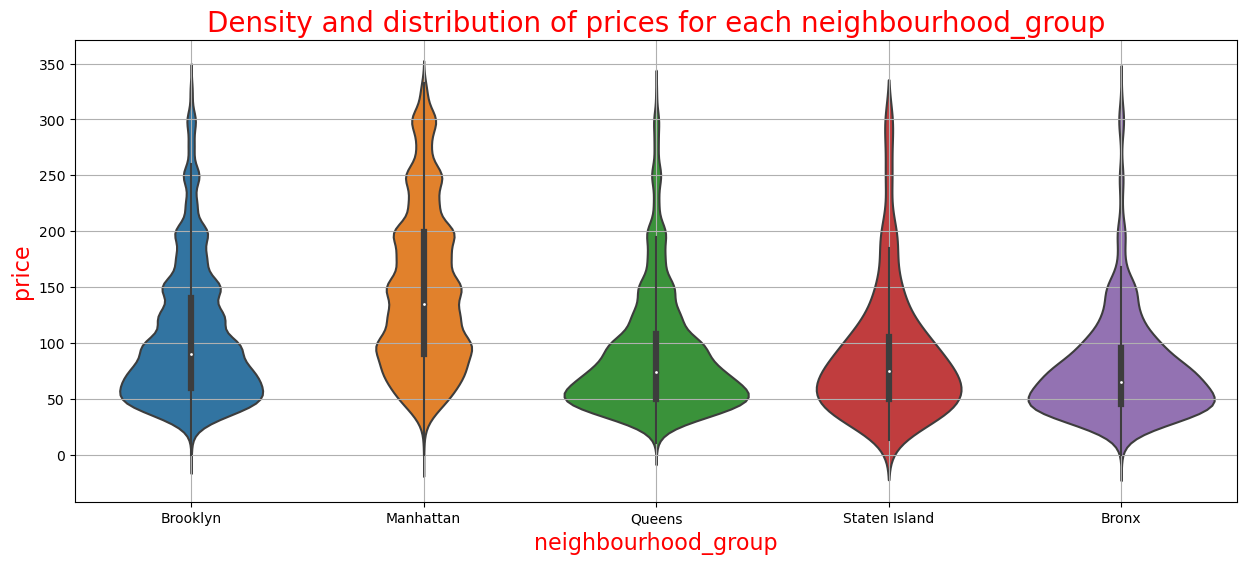

In [100]:
plt.figure(figsize = (15,6))
sns.violinplot(x ='neighbourhood_group', y ='price',data = df_new)
plt.title('Density and distribution of prices for each neighbourhood_group', fontsize = 20,color='r')
plt.xlabel('neighbourhood_group',size=16,color='r')
plt.ylabel('price',size=16,color='r')
plt.grid()

# Observation

1.We can observe that Manhattan city has the highest range of prices for the listings with 135 price 
as median observation, followed by Brooklyn with price 90 per night                                   
2. Queens and Staten Island appear to have very similar distributions from median observation  
3.Bronx is the cheapest of them all.

# 5.Room type

In [105]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


In [107]:
 #Getting the value counts
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [109]:
slices=df['room_type'].value_counts()
room=['Entire home/apt','Private room','Shared room']

Text(0.5, 1.0, 'Room type')

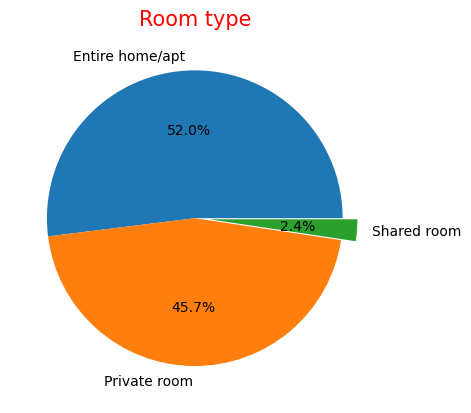

In [116]:
plt.pie(slices,labels=room,explode=(0,0,0.1),autopct="%1.1f%%")
plt.title('Room type',size=15,color='r')

# Observation

1.Most of the people enlist their entire home or apartment in the Airbnb which constitutes to 52%     
according to the pie chart.                                                                           
2.Followed by 45.7% people consider having private room,                                              
3.and shared room is the least considered room type.

# 6.Average Prices for different room type

In [121]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


In [123]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

Text(0.5, 1.0, 'Average Prices for different room type')

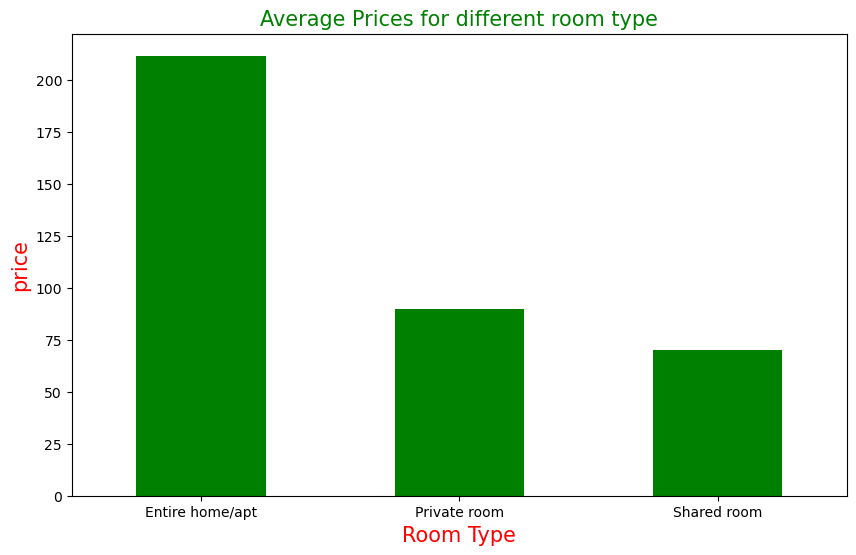

In [125]:
x=df.groupby('room_type')['price'].mean()
plt.figure(figsize=(10,6))
x.plot(kind='bar',color='g')
plt.xlabel('Room Type',size=15,color='r')
plt.xticks(rotation =0)
plt.ylabel('price',size=15,color='r')
plt.title('Average Prices for different room type',size=15,color='g')

# Observations

1.The Average price of the room type "Entire home or apartment" is the highest followed by "Private 
room" type and "shared room" type

# 7.Minimum nights for different room types

In [130]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


In [100]:
# Getting the average of the minimum nights to be stayed in the different room types
df.groupby(['room_type'])['minimum_nights'].mean()

room_type
Entire home/apt    8.506907
Private room       5.377900
Shared room        6.475000
Name: minimum_nights, dtype: float64

Text(0.5, 1.0, 'Minimum average stay')

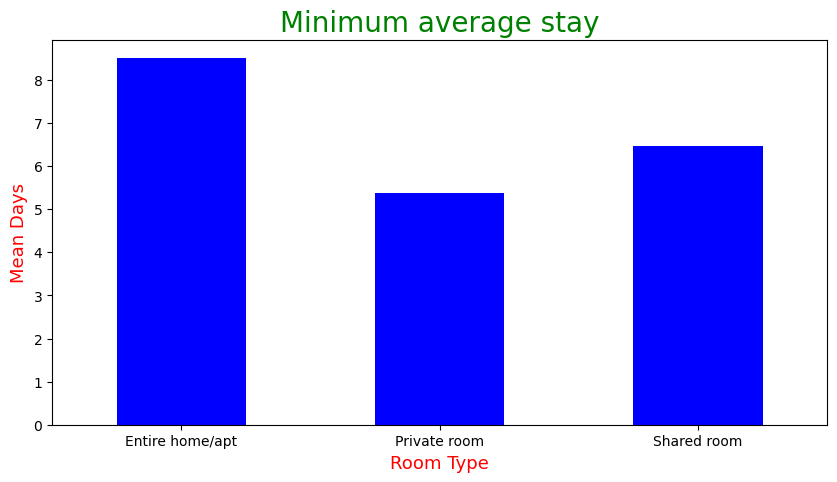

In [123]:
x=df.groupby(['room_type'])['minimum_nights'].mean()
plt.figure(figsize=(10,5))
x.plot(kind='bar',color='b')
plt.xlabel('Room Type',size=13,color='r')
plt.xticks(rotation =0)
plt.ylabel('Mean Days',size=13,color='r')
plt.title('Minimum average stay',size=20,color='g')

# Observations

1.The mimimum days to stays in entire home/apt is approx 9 days, also it has maximum price.           
2.The minimum days to stay for private room 5 days                                                     
3.The minimum days to stay for shared room is 6 days.

# 8.Neighbouthood group with respect to room type

In [125]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.1,1,0


Text(0.5, 1.0, 'Room Type on Neighbourhood Group')

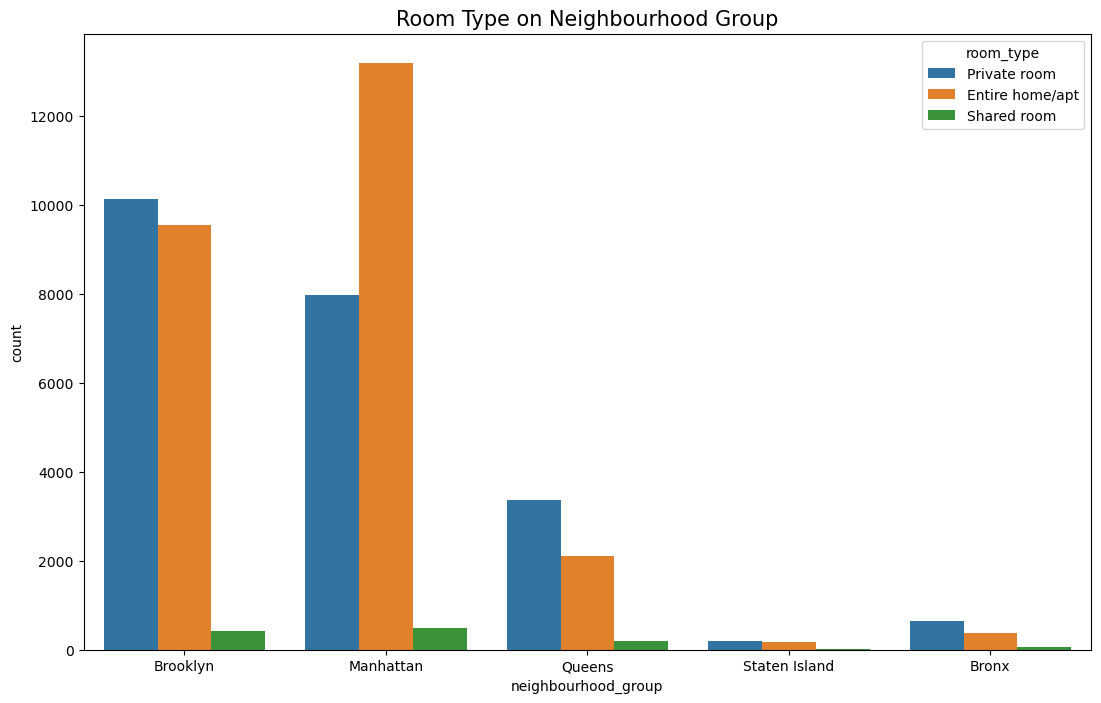

In [128]:
plt.figure(figsize = (13,8))
sns.countplot(x='neighbourhood_group', hue='room_type',data=df)
plt.title("Room Type on Neighbourhood Group", fontsize = 15)

# Observation

1.It looks like, the neighbourhood group Manhatten has the highest Entire home/apt amongst all
othergroups.                                                                                           
2.but Brooklyn has the most number of private rooms.                                                   
3.Manhatten and Brooklyn has almost same number of Shared room.

# THE END